# 1. Data prepping

In [66]:
# %pip install pandas tensorflow numpy scikit-learn
# %pip install matplotlib

In [67]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import math

In [68]:
orig_dataframe = pd.read_csv("marketing_campaign.csv")

# delete broken data
orig_dataframe = orig_dataframe.dropna(how='any',axis=0)
raw_dataframe = orig_dataframe

# dropping columns
orig_dataframe = orig_dataframe.drop("ID", axis=1)
orig_dataframe = orig_dataframe[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds", "Income"]]

dataframe = orig_dataframe.copy(deep=True)

# dataframe - replaced discrete values and selected columns
# orig_dataframe - selected columns
# raw_dataframe - raw 

In [69]:
# # replace categorical data with discrete whole numbers
# categorical_column_keys = ["Education", "Marital_Status"]
# categorical_unique_values = {}

# for i in categorical_column_keys:
#     unique = dataframe[i].unique()
#     categorical_unique_values[i] = unique
#     dataframe[i].replace(unique, np.arange(0, len(dataframe[i].unique()), 1, dtype=int), inplace=True)

In [70]:
orig_dataframe

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income
0,635,88,546,172,88,88,58138.0
1,11,1,6,2,1,6,46344.0
2,426,49,127,111,21,42,71613.0
3,11,4,20,10,3,5,26646.0
4,173,43,118,46,27,15,58293.0
...,...,...,...,...,...,...,...
2234,709,43,182,42,118,247,61223.0
2235,406,0,30,0,0,8,64014.0
2236,908,48,217,32,12,24,56981.0
2237,428,30,214,80,30,61,69245.0


In [71]:
# engineer features

In [72]:
dataframe

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income
0,635,88,546,172,88,88,58138.0
1,11,1,6,2,1,6,46344.0
2,426,49,127,111,21,42,71613.0
3,11,4,20,10,3,5,26646.0
4,173,43,118,46,27,15,58293.0
...,...,...,...,...,...,...,...
2234,709,43,182,42,118,247,61223.0
2235,406,0,30,0,0,8,64014.0
2236,908,48,217,32,12,24,56981.0
2237,428,30,214,80,30,61,69245.0


In [73]:
# craft input and output data
X = dataframe.values
X_orig = orig_dataframe.values
X_raw = raw_dataframe.values

In [74]:
# tensorflow conversion
# tf.convert_to_tensor(X)
# tf.convert_to_tensor(y)

In [75]:
# test these individually in the codeblock below

# data testing
# dataframe
# dataframe.dtypes
# dataframe.keys()
# X
# X.shape

# # data validation
# dataframe.isnull().any()

In [76]:
dataframe.keys()

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Income'],
      dtype='object')

In [77]:
# normalize features
normalization_layer = tf.keras.layers.Normalization(axis=-1)
normalization_layer.adapt(X)
X_normalized = normalization_layer(X).numpy()

## 1.1. Visualization

In [78]:
import matplotlib.pyplot as plt

[Text(0.5, 0, 'x_1 - amount spent on fruits'), Text(0, 0.5, 'y - income')]

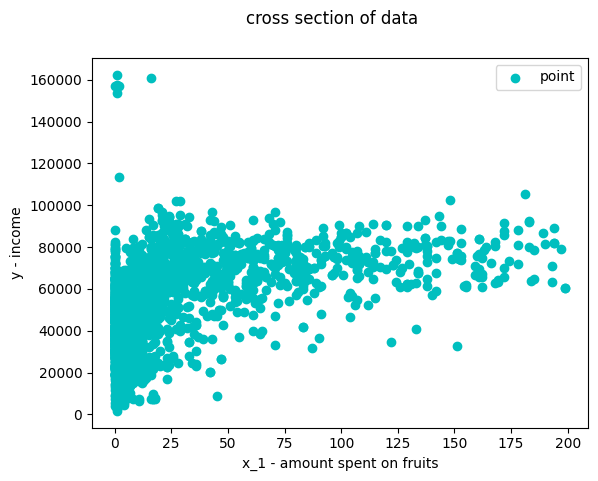

In [79]:
fig, axs = plt.subplots(1, 1)
fig.suptitle(f'cross section of data')
# customize this line!
points = axs.scatter(X[:,1], X[:,6], c="c")
points.set_label('point')
axs.legend()
axs.set(xlabel='x_1 - amount spent on fruits', ylabel='y - income')


# 2. Train (clustering)

## choosing the number of centroids

In [80]:
import sklearn as sk
from sklearn.cluster import KMeans
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

models = []
inertias = []

CENTROIDS_RANGE = range(1, 15)
for i in CENTROIDS_RANGE:
    # number of centroids
    K = i

    model = KMeans(n_clusters=K, random_state=None) # random_state=0 if you want to reproduce anything
    model.fit(X_normalized)
    models.append(model)
    inertias.append(model.inertia_)

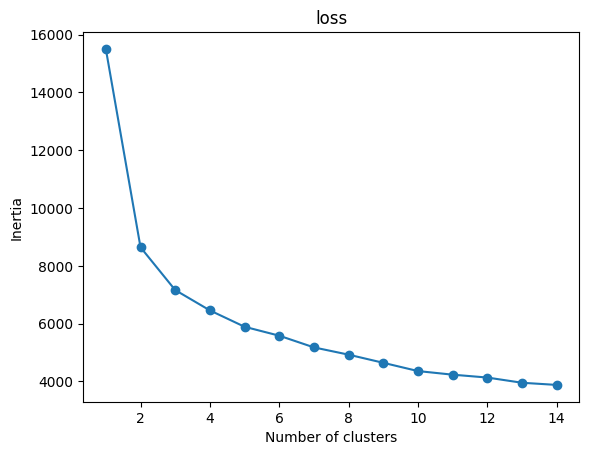

In [81]:
plt.plot(CENTROIDS_RANGE, inertias, marker='o')
plt.title('loss')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

## traning many random instances of K-means to minimize cost

In [93]:
K = 6 # chosen
new_models = []
new_inertias = []
reps = 100
for i in range(reps):
    model = KMeans(n_clusters=K, random_state=None)
    model.fit(X_normalized)
    new_models.append(model)
    new_inertias.append(model.inertia_)
model = new_models[np.argmin(new_inertias)]

## checking values

In [94]:
model.labels_ == 3

array([False, False, False, ..., False, False, False])

In [95]:
len(X[model.labels_ == 3])

179

In [96]:
model.labels_

array([0, 1, 4, ..., 4, 4, 1], dtype=int32)

In [97]:
len(model.cluster_centers_)

6

In [98]:
model.inertia_

5455.77783203125

## plotting

In [99]:
from matplotlib.axes import Axes

In [100]:
dataframe.keys()

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Income'],
      dtype='object')

In [101]:
OUTPUT = model.labels_

In [102]:
def get_display_for_property(CLUSTER, PROPERTY):
    COL = X[:, PROPERTY]
    SELECTED = COL[OUTPUT == CLUSTER]

    MAX = np.max(COL)
    MIN = np.min(COL)
    RANGE = MAX-MIN

    PARTS = 20
    
    DISPLAYED_COL = np.full(PARTS+1, 0)
    for i in SELECTED:
        DISPLAYED_COL[math.floor((i-MIN)/MAX*PARTS)] += 1
    
    return DISPLAYED_COL, MIN, MAX, RANGE


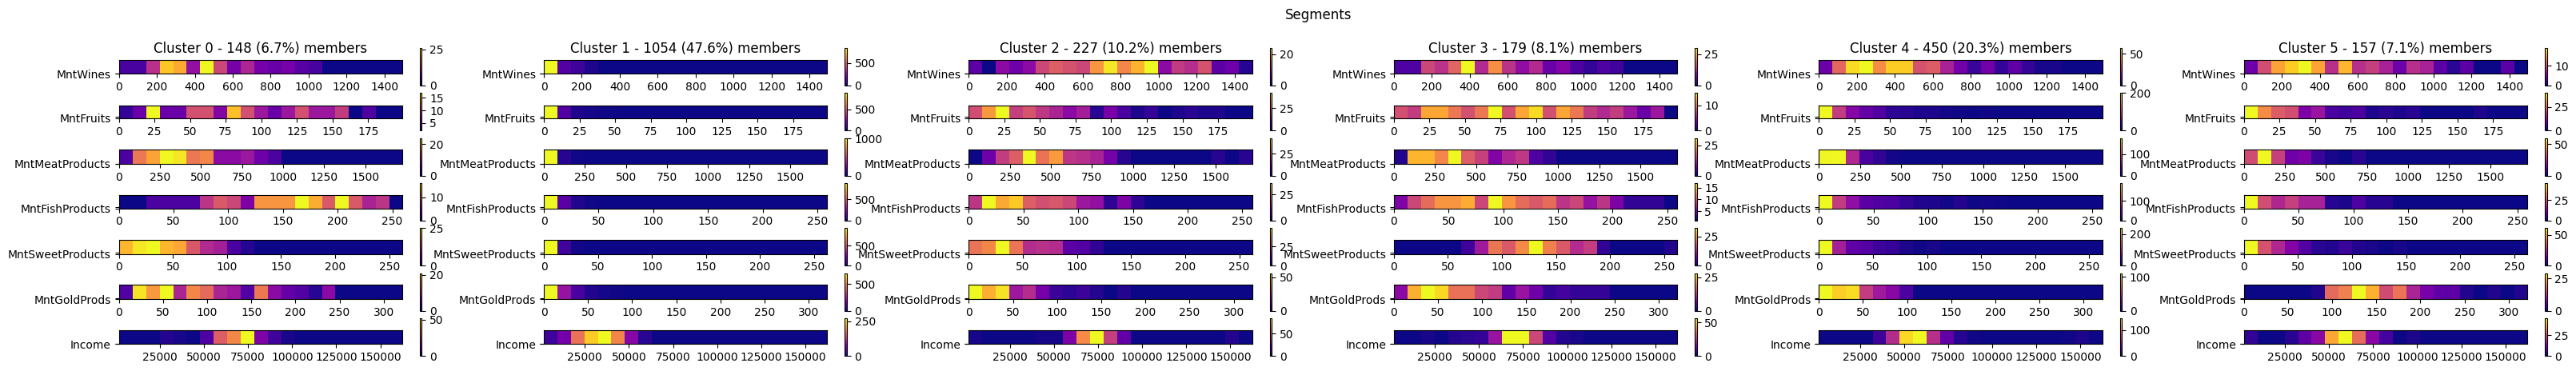

In [104]:
P = len(dataframe.keys())

fig, axs = plt.subplots(P, K)
fig.suptitle('Segments')
# fig.set_size_inches(10, 10)

for CLUSTER in range(K):
    for PROPERTY in range(P):
        ax:Axes = axs[PROPERTY][CLUSTER]
        ax.figure.set_size_inches(40, 5)

        DISPLAYED_COL, MIN, MAX, RANGE = get_display_for_property(CLUSTER, PROPERTY)

        img = ax.imshow(DISPLAYED_COL.reshape(1, -1), cmap="plasma", extent=(MIN, MAX, 0, RANGE//20))
        
        img.axes.set_yticks([0, 1])
        img.axes.set_yticklabels([dataframe.keys()[PROPERTY], ""])
        plt.colorbar(img)

        if PROPERTY == 0:
            ax.set_title(f"Cluster {CLUSTER} - {len(OUTPUT[OUTPUT == CLUSTER])} ({round(len(OUTPUT[OUTPUT == CLUSTER])/len(OUTPUT)*100, 1)}%) members")